**NetworkX** jest biblioteką dostępną w Pythonie, która służy do tworzenia, manipulacji i badania grafów i sieci.

### Instalacja
**pip install networkx**


In [1]:
import networkx as nx

### Tworzenie grafu


Graf to taka struktura danych, która składa się z wierzchołków i krawędzi, przy czym poszczególne wierzchołki (zwane też węzłami) mogą być połączone krawędziami (skierowanymi lub nieskierowanymi) w taki sposób, iż każda krawędź zaczyna się i kończy w którymś z wierzchołków.

Wierzchołki mogą być dowolnym hashowalnym obiektem.

Podstawowe typy grafów:



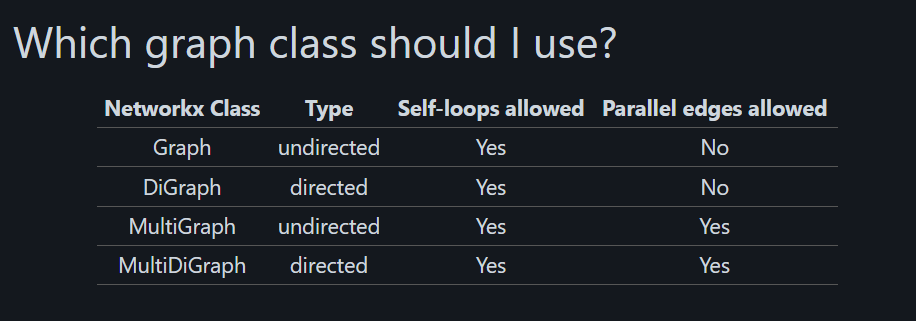

In [2]:
G_Graph = nx.Graph()
G_DiGraph = nx.DiGraph()
G_Multi = nx.MultiGraph()
G_DiMulti = nx.MultiDiGraph()

Graf może być w różny sposób zbudowany.

Na przykład

Dodając wierzchołki pojedynczo

In [3]:
G_Graph.add_node(1)

Dodając wierzchołki z iterable container

In [4]:
G_Graph.add_nodes_from([2, 3])

Możemy dodać wierzchołek z atrybutem przekazując tuple

In [5]:
G_Graph.add_nodes_from([
    (4, {"color": "red"}),
    (5, {"color": "green"}),
])

In [6]:
G_Graph.nodes

NodeView((1, 2, 3, 4, 5))

### Edges

Jeżeli spróbujemy dodać krawędź do wierzchołka który nie istnieje to automatycznie stworzymy dany wierzchołek oraz krawędź prowadzącą do niego.

In [7]:
G_Graph.add_edge(1, 2)

Możemy też dodać z iterable container

In [8]:
G_Graph.add_edges_from([(1, 2), (1, 3)])

In [9]:
G_Graph.edges

EdgeView([(1, 2), (1, 3)])

In [10]:
G_Graph.add_edge(1, 11)
print(G_Graph.edges)
print(G_Graph.nodes)

[(1, 2), (1, 3), (1, 11)]
[1, 2, 3, 4, 5, 11]


Możemy też dodać krawędź przekazując atrybut
Wiele algorytmów w NetworkX zaprojektowanych dla grafów ważonych przyjmują atrybut krawędzi defultowo 'weight' jako wartość liczbowa

In [16]:
G_Graph.add_edge(2, 11, **{'weight': 3.1415})
G_Graph.add_edge(1, 3, weight=7, capacity=15, length=342.7)

### Nodes Access

Dostęp do atrybutu wierchołka

In [17]:
G_Graph.nodes[4]

{'color': 'red'}

Połączenia wierzchołka

In [18]:
G_Graph[1]

AtlasView({2: {}, 3: {'weight': 7, 'capacity': 15, 'length': 342.7}, 11: {}})

Zmiana atrybutu

In [19]:
G_Graph.nodes[4]['color']='black'
G_Graph.nodes[4]

{'color': 'black'}

### Edge Access

Dostęp do atrybutu krawędzi

Brak wierzchołka

In [20]:
G_Graph[1][21]

KeyError: 21

Bez atrybutu

In [21]:
G_Graph[1][2]

{}

Z atrybutem

In [22]:
G_Graph[1][3]

{'weight': 7, 'capacity': 15, 'length': 342.7}

Zmiana atrybutu

In [23]:
G_Graph[1][3]['weight'] = 12
G_Graph[1][3]

{'weight': 12, 'capacity': 15, 'length': 342.7}

Atrubuty mogą być dowolnym obiektem, mogą być one przypisane do krawędzi, wierzchołków, grafów. Najpopularniejszymi atrybutami są weights, labels, colors.
Atrybuty są przechowywane w dictionary. Defaultowo dictionary z atrybutami jest pusty. Atrybuty mogą być dodawane oraz zmieniane. 

### Graph attributes

In [24]:
G = nx.Graph(day="Friday")
G.graph


{'day': 'Friday'}

In [25]:
G.graph['day'] = "Monday"
G.graph

{'day': 'Monday'}

Graph adjency przechowuje informaje o sąsiadach wierzchołków

In [26]:
G_Graph.adj

AdjacencyView({1: {2: {}, 3: {'weight': 12, 'capacity': 15, 'length': 342.7}, 11: {}}, 2: {1: {}, 11: {'weight': 3.1415}}, 3: {1: {'weight': 12, 'capacity': 15, 'length': 342.7}}, 4: {}, 5: {}, 11: {1: {}, 2: {'weight': 3.1415}}})

In [27]:
G_Graph[1]==G_Graph.adj[1]

True

Stopnie wierzchołków

In [29]:
G_Graph.degree

DegreeView({1: 3, 2: 2, 3: 1, 4: 0, 5: 0, 11: 2})

### Directed graphs


In [30]:
G_DiGraph = nx.DiGraph()

Klasa DiGraph dodaje dodatkowe funkcjonalności oraz metody, które są charakterystyczne dla grafów skierowanych

In [31]:
G_DiGraph.add_nodes_from([1,2,3,4,5,6])

In [32]:
G_DiGraph.nodes

NodeView((1, 2, 3, 4, 5, 6))

In [33]:
G_DiGraph.add_edges_from([(1, 2), (1, 3),(4, 5)])

In [34]:
G_DiGraph.edges

OutEdgeView([(1, 2), (1, 3), (4, 5)])

In [35]:
G_DiGraph.in_degree

InDegreeView({1: 0, 2: 1, 3: 1, 4: 0, 5: 1, 6: 0})

In [36]:
G_DiGraph.out_degree

OutDegreeView({1: 2, 2: 0, 3: 0, 4: 1, 5: 0, 6: 0})

degree jest sumą in_degree i out_degree

In [37]:
G_DiGraph.degree

DiDegreeView({1: 2, 2: 1, 3: 1, 4: 1, 5: 1, 6: 0})

Sąsiedzi wierzchołków

In [38]:
print(G_DiGraph[1])
print(G_DiGraph[2])

{2: {}, 3: {}}
{}


Mozna stworzyc odrazy krawedz z atrybutem weight

In [39]:
G_DiGraph.add_weighted_edges_from([(1, 11, 0.5), (3, 1, 0.75),(11,1,0.3)])


In [40]:
print(G_DiGraph[1])
print(G_DiGraph[11])


{2: {}, 3: {}, 11: {'weight': 0.5}}
{1: {'weight': 0.3}}


Możemy przekształcić graf skierowany do nieskierowanego z parametrem reciprocal=True zachowuje krawedź miedzy wiechołkami tylko gdy istnieją w obu kierunkach.

In [41]:
G_Graph2=nx.Graph.to_undirected(G_DiGraph)
print(G_Graph2[1])
print(G_Graph2[11])

{2: {}, 3: {'weight': 0.75}, 11: {'weight': 0.3}}
{1: {'weight': 0.3}}


Jeżeli istnieje krawedz (v,u) oraz (v,u) w grafie skierowanym to przy zamianie na graf nieskierowany, atrybuty beda kombinacji z jednej i drugiej krawedzi. Atrybuty krawędzi są aktualizowane w (dowolnej) kolejności, w jakiej napotykane są krawędzie.

Istnieje metoda to_directed która zamienia graf nieskierowany na skierowany, gdzie dla kazdej krawedzi (u,v,data) uzyskujemy krawędzie (u,v,data) i (v,u,data) 

### Drawing graphs

In [42]:
import matplotlib.pyplot as plt

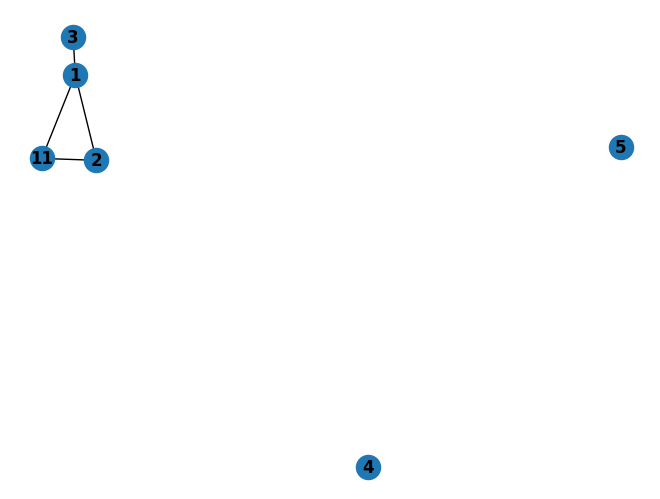

In [43]:
nx.draw(G_Graph,with_labels=True,font_weight='bold')

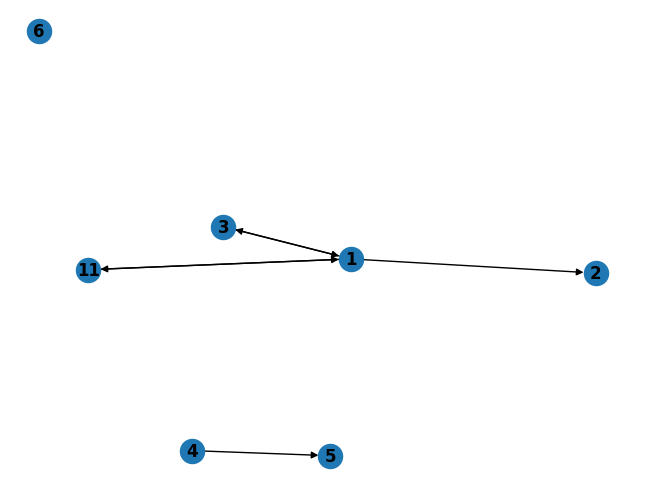

In [44]:
nx.draw(G_DiGraph, with_labels=True,font_weight='bold')

### Algorytmy

In [45]:
G_DiGraph.add_edges_from([(6,2),(4,11),(4,6)])

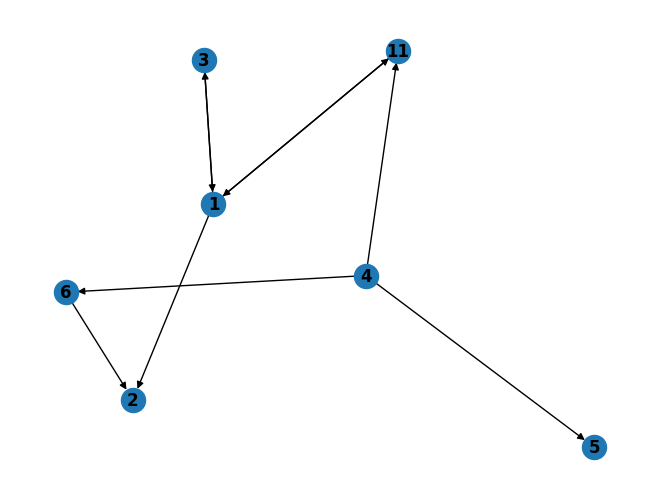

In [51]:
nx.draw(G_DiGraph, with_labels=True, font_weight='bold')

In [47]:
list(nx.dfs_edges(G_DiGraph,1))

[(1, 2), (1, 3), (1, 11)]

In [48]:
nx.shortest_path(G_DiGraph,weight='weight', source=4) 
# każda krawędź która nie ma atrybutu 'weight' domyślnie jest zastępowana wartością 1
# defaultowo weight=None, wtedy każda krawedz ma wage 1

{4: [4],
 5: [4, 5],
 11: [4, 11],
 6: [4, 6],
 1: [4, 11, 1],
 2: [4, 6, 2],
 3: [4, 11, 1, 3]}

In [49]:
nx.is_planar(G_DiGraph)

True

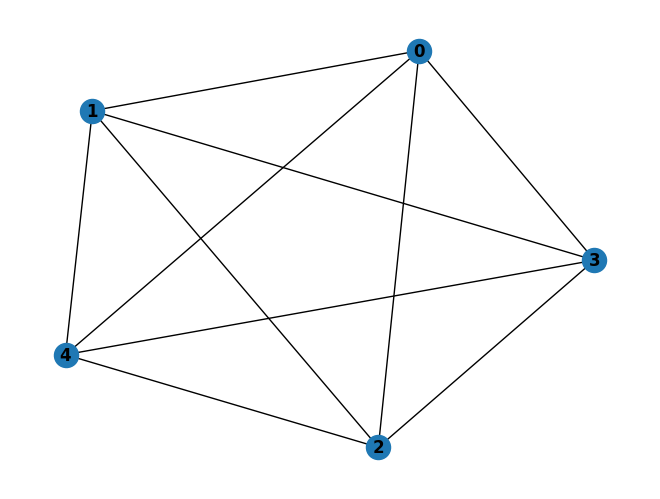

In [52]:
k5_graph = nx.complete_graph(5)
nx.draw(k5_graph, with_labels=True, font_weight='bold')


In [53]:
nx.is_planar(k5_graph)

False

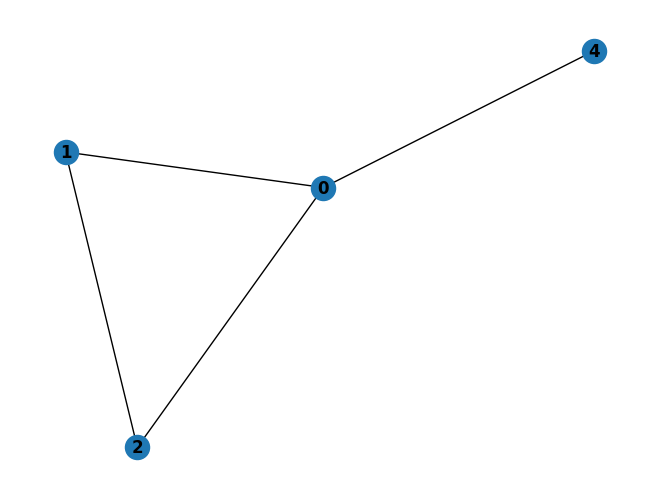

In [54]:
G = nx.Graph([(0, 1), (1, 2), (0, 2),(0,4)])
nx.draw(G, with_labels=True, font_weight='bold')


Graf eulerowski odznacza się tym, że da się w nim skonstruować cykl Eulera, czyli cykl, który przechodzi przez każdą jego krawędź dokładnie raz.

In [56]:
nx.is_eulerian(G)


False

In [57]:
nx.is_connected(G)

True

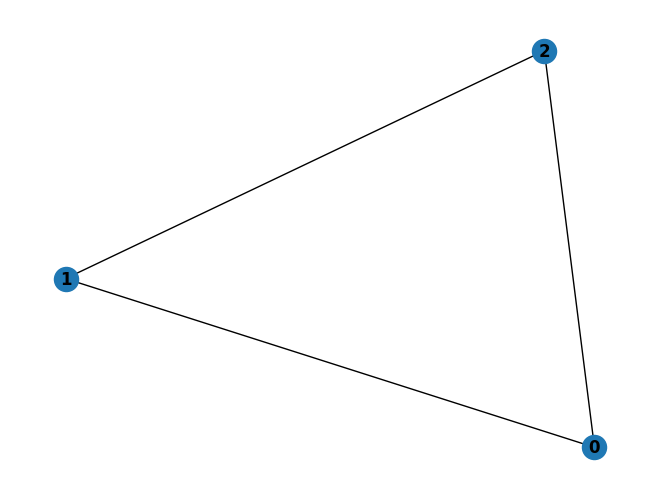

In [58]:
G.remove_node(4)
nx.draw(G, with_labels=True, font_weight='bold')

In [59]:
nx.is_eulerian(G)

True

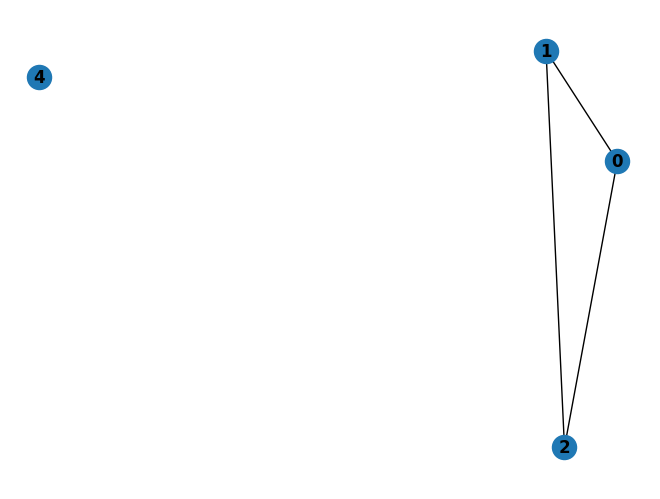

In [60]:
G.add_node(4)
nx.draw(G, with_labels=True, font_weight='bold')

In [61]:
nx.is_connected(G)

False

Ref

https://networkx.org/documentation/stable/reference/algorithms/index.html

https://networkx.org/documentation/stable/reference/generators.html

